In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:
df = pd.read_csv("./Data/healthcare-dataset-stroke-data.csv")

In [78]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [80]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [81]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [82]:
data1 = df.copy()

In [83]:
data1['gender'].value_counts(dropna=False)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender pie chart')

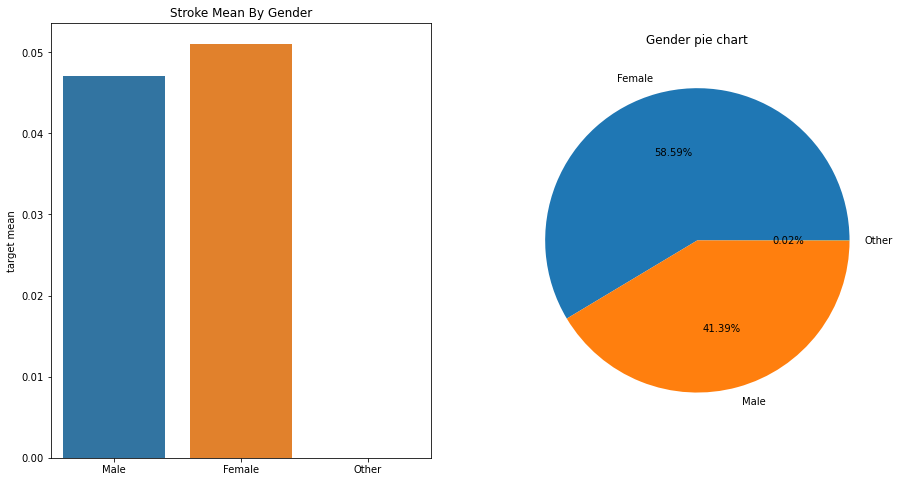

In [84]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
#tim moi quan hen giua gender va stroke 
mean_target_per_gender = data1.groupby('gender',dropna=False)['stroke'].mean()
mean_target_per_gender.index = ['Male', 'Female', 'Other']
sns.barplot(x=mean_target_per_gender.index, y=mean_target_per_gender)
plt.ylabel('target mean')
plt.title('Stroke Mean By Gender')
fig = plt.subplot(1,2,2)
# pie chart 
kinds = ['Female', 'Male', 'Other']
counts = [2994, 2115, 1]
fig.pie(counts,labels = kinds,autopct='%1.2f%%')
plt.title('Gender pie chart')

In [85]:
gender_list = data1['gender'].unique().tolist()
gender_list.sort()


In [86]:
for idx, value in enumerate(gender_list):
    data1['gender'] = data1['gender'].replace(value, idx)

In [87]:
data1['gender']

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5110, dtype: int64

Text(0.5, 1.0, 'Boxplot for age')

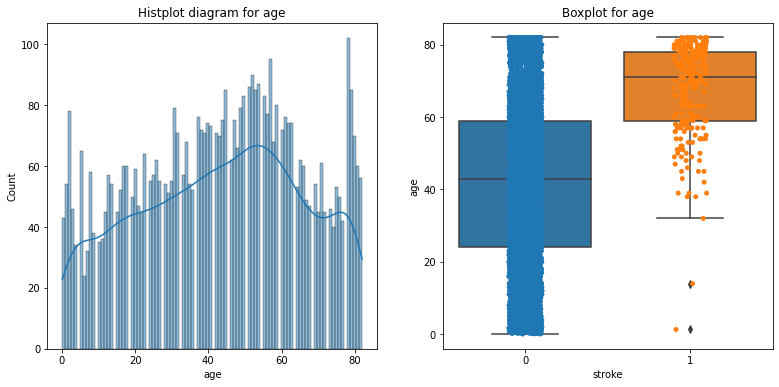

In [88]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1['age'],bins=100,kde=True)
plt.title("Histplot diagram for age")
plt.subplot(1,2,2)
sns.boxplot(x='stroke',y='age',data=data1)
sns.stripplot(x='stroke',y='age',data=data1,jitter=True,edgecolor='gray')
plt.title("Boxplot for age")

Text(0.5, 1.0, 'Relationship between pos and neg of stroke by hypertension')

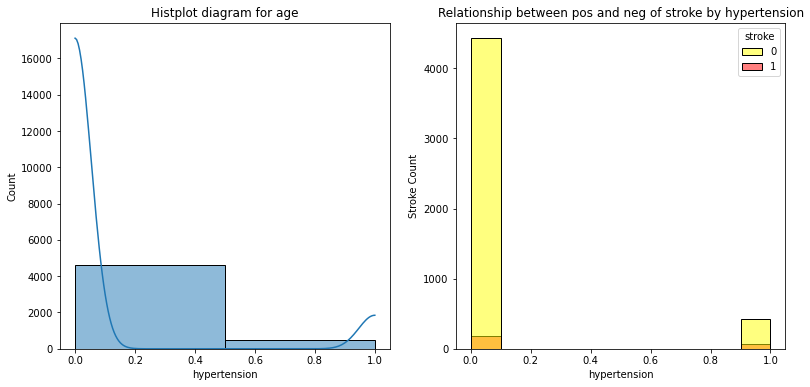

In [89]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data1['hypertension'],bins=2,kde=True)
plt.title("Histplot diagram for age")
plt.subplot(1,2,2)
sns.histplot(data=data1,x='hypertension',hue='stroke',multiple='layer',palette=['yellow','red'],bins=10)
plt.ylabel('Stroke Count')
plt.title('Relationship between pos and neg of stroke by hypertension')

Text(0.5, 1.0, 'Pie Chart for heart_disease')

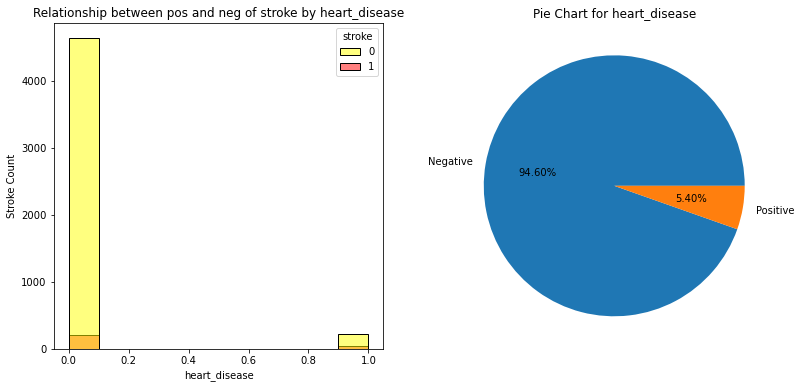

In [90]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data=data1, x='heart_disease', hue='stroke',multiple='layer', palette=['yellow', 'red'], bins=10);
plt.ylabel('Stroke Count')
plt.title('Relationship between pos and neg of stroke by heart_disease')
fig = plt.subplot(1,2,2)
# pie chart 
kinds = ['Negative', 'Positive']
counts = [4834, 276]
fig.pie(counts, labels = kinds,autopct='%1.2f%%')
plt.title('Pie Chart for heart_disease')

Text(0.5, 1.0, 'ever_married pie chart')

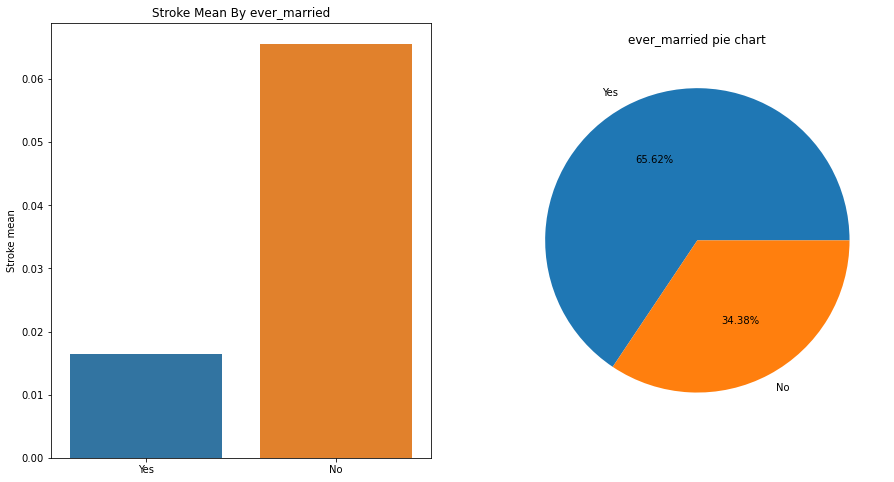

In [91]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
# tìm mối quan hệ giữa ever_married và stroke
mean_target_per_ever_married = data1.groupby('ever_married', dropna=False)['stroke'].mean()
mean_target_per_ever_married.index = ['Yes', 'No']
sns.barplot(x=mean_target_per_ever_married.index, y=mean_target_per_ever_married)
plt.ylabel('Stroke mean')
plt.title('Stroke Mean By ever_married')
fig = plt.subplot(1,2,2)
# pie chart 
kinds = ['Yes', 'No']
counts = [3353, 1757]
fig.pie(counts, labels = kinds,autopct='%1.2f%%')
plt.title('ever_married pie chart')

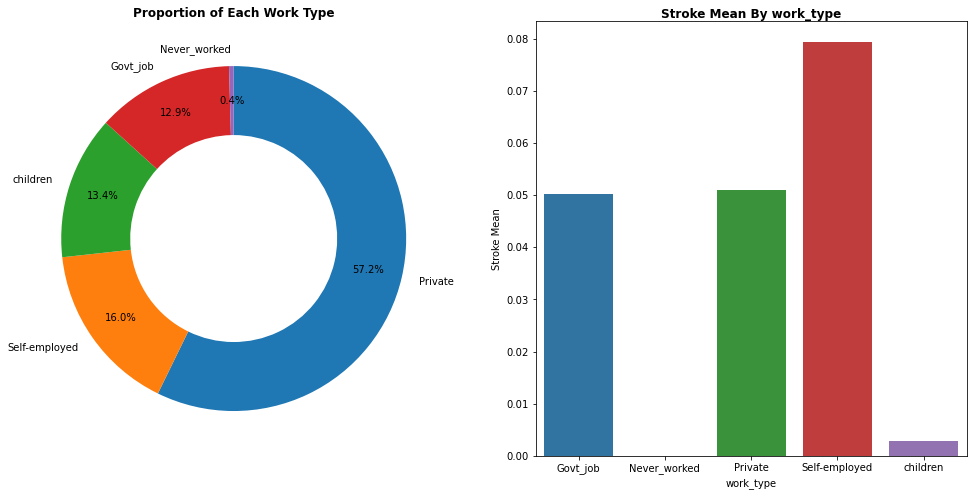

In [92]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,8))
work_type_count = data1.work_type.value_counts(dropna=False)
ax1.pie(work_type_count,labels=work_type_count.index,startangle=90,counterclock=False,
        wedgeprops={'width':0.4}, autopct = "%1.1f%%", pctdistance=0.80);
ax1.set_title('Proportion of Each Work Type', fontsize=12, fontweight='bold')
# relationship 
mean_stroke_by_work = data1.groupby('work_type', dropna=False).agg({'stroke':np.mean})
sns.barplot(x=mean_stroke_by_work.index, y=mean_stroke_by_work.stroke, ax=ax2)
ax2.set_ylabel('Stroke Mean')
ax2.set_title('Stroke Mean By work_type', fontsize=12, fontweight='bold', pad=0.8);

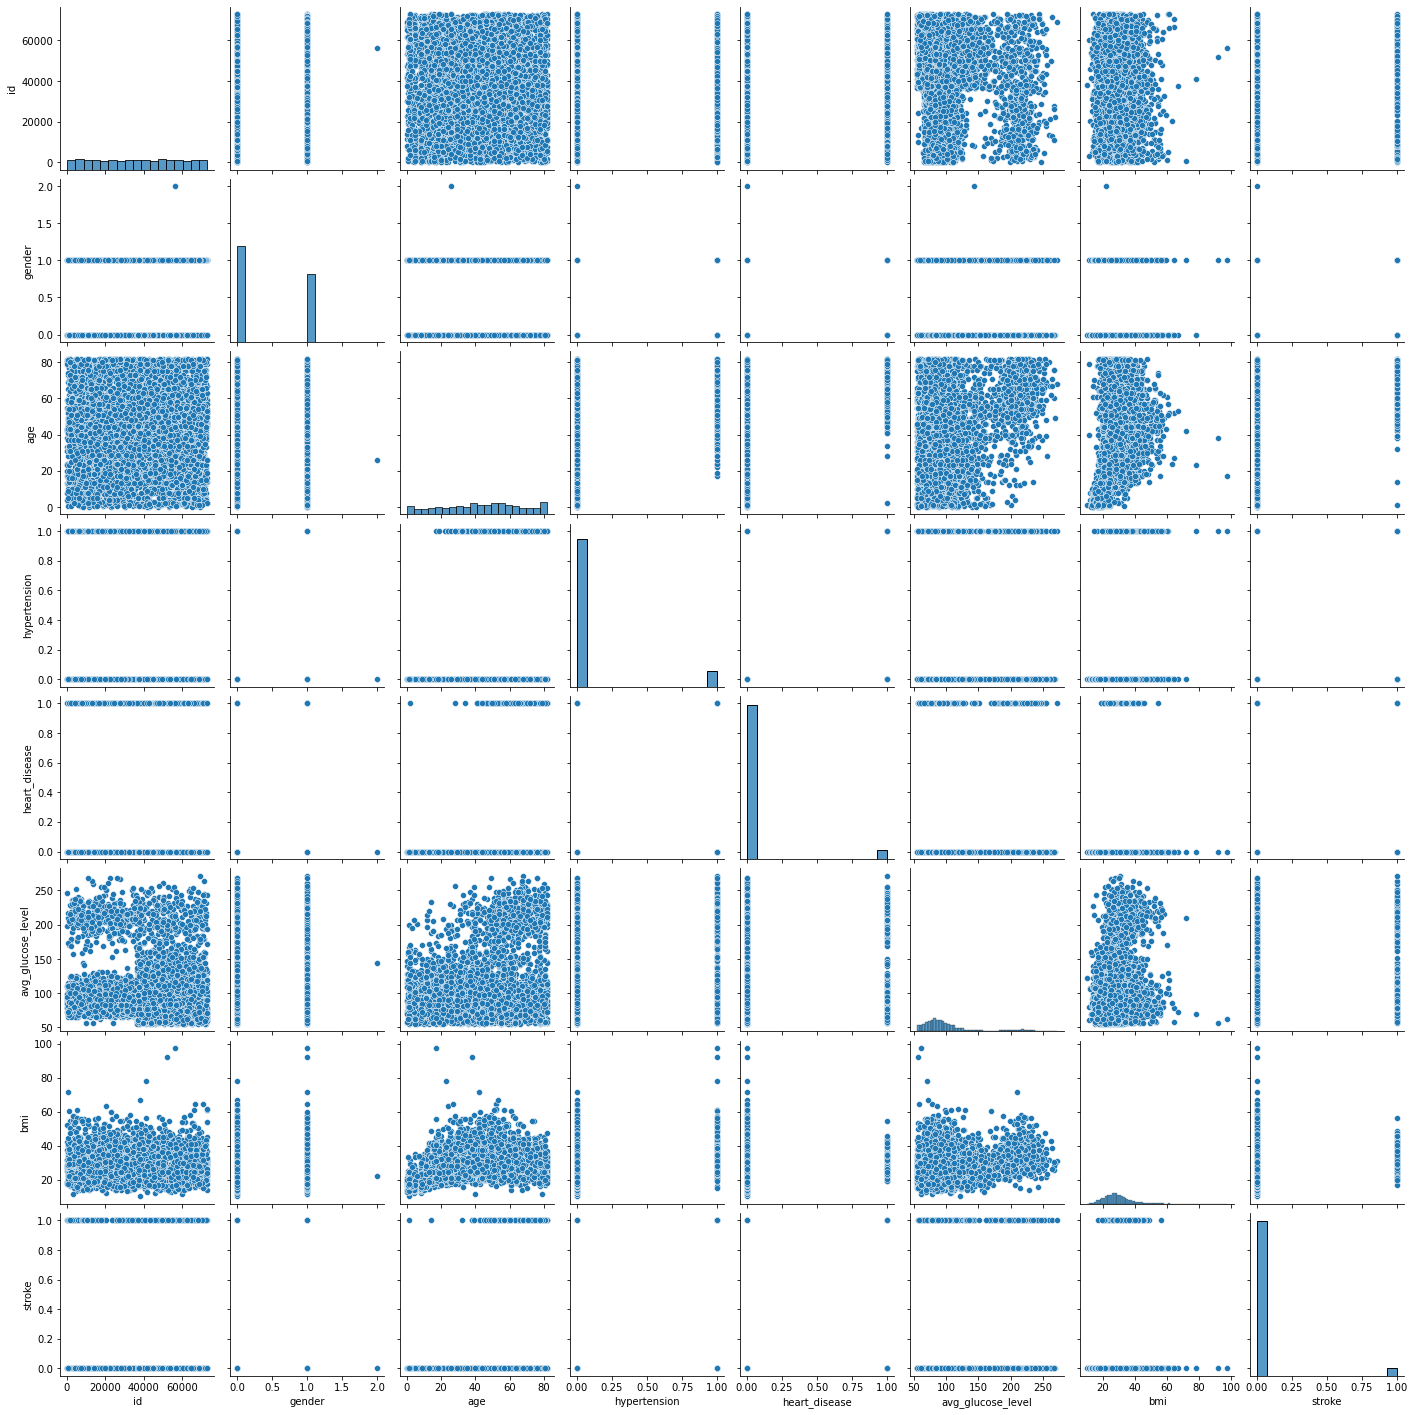

In [93]:
sns.pairplot(data=data1,kind='scatter')

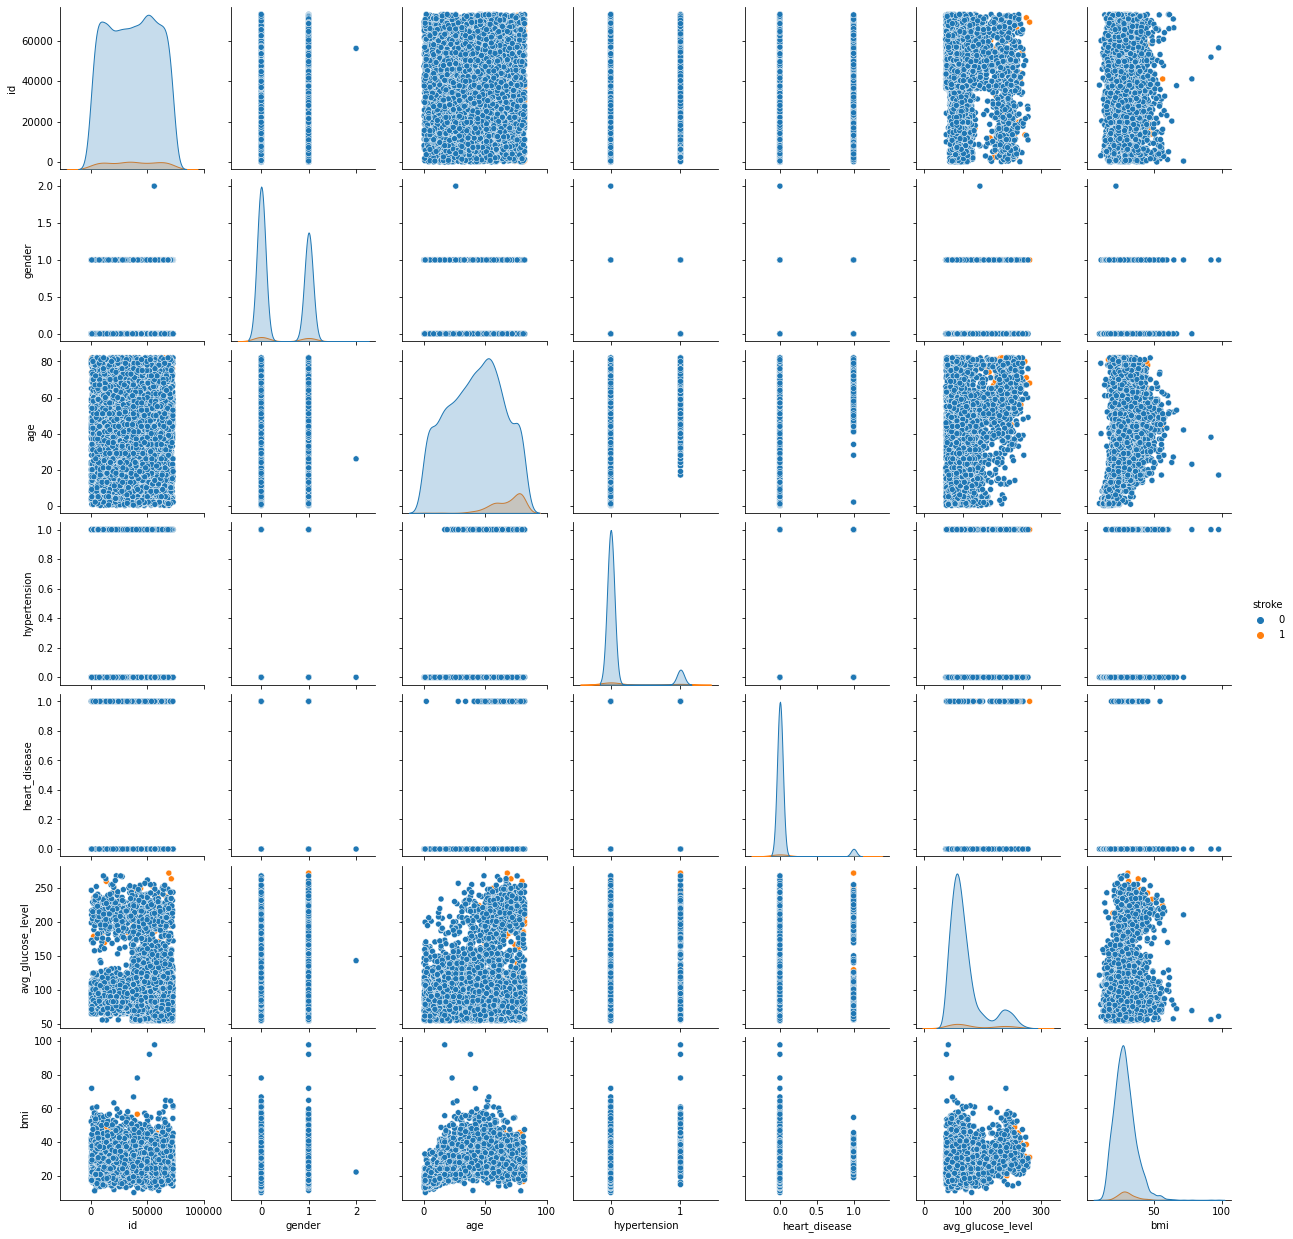

In [94]:
sns.pairplot(data=data1,hue='stroke')

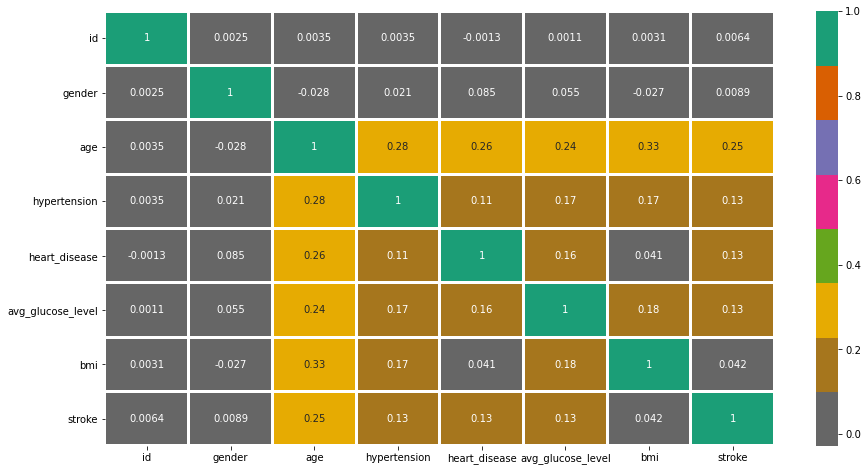

In [95]:
plt.figure(figsize=(15,8)) 
sns.heatmap(data1.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [96]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.impute import SimpleImputer, KNNImputer

In [97]:
#Model Selection
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [98]:
data1.drop(columns="id",inplace=True)

In [99]:
data1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,0,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,0,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,1,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [100]:
work_type_list = data1['work_type'].unique().tolist()
work_type_list.sort()

for idx, value in enumerate(work_type_list):
    data1['work_type'] = data1['work_type'].replace(value, idx)

data1['work_type']

0       2
1       3
2       2
3       2
4       3
       ..
5105    2
5106    3
5107    3
5108    2
5109    0
Name: work_type, Length: 5110, dtype: int64

In [101]:
Residence_type_list = data1['Residence_type'].unique().tolist()
Residence_type_list.sort()

for idx, value in enumerate(Residence_type_list):
    data1['Residence_type'] = data1['Residence_type'].replace(value, idx)

data1['Residence_type']

0       1
1       0
2       0
3       1
4       0
       ..
5105    1
5106    1
5107    0
5108    0
5109    1
Name: Residence_type, Length: 5110, dtype: int64

In [102]:
# encode data cho smoking_status
smoking_status_list = data1['smoking_status'].unique().tolist()
smoking_status_list.sort()

for idx, value in enumerate(smoking_status_list):
    data1['smoking_status'] = data1['smoking_status'].replace(value, idx)

data1['smoking_status']

0       1
1       2
2       2
3       3
4       2
       ..
5105    2
5106    2
5107    2
5108    1
5109    0
Name: smoking_status, Length: 5110, dtype: int64

In [106]:
ever_married_list = data1['ever_married'].unique().tolist()
ever_married_list.sort()

for idx, value in enumerate(ever_married_list):
    data1['ever_married'] = data1['ever_married'].replace(value, idx)

data1['ever_married']

0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 5110, dtype: int64

In [107]:
# chia train , test
X = data1.drop('stroke', axis=1)
y = data1[['stroke']]

In [108]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [109]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X = st.fit_transform(X)
X

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  2.70637544,
         0.98134488, -0.35178071],
       [-0.840344  ,  0.78607007, -0.32860186, ...,  2.12155854,
                nan,  0.58155233],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.45926914,  0.58155233],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -0.51144264,
         0.21733161,  0.58155233],
       [ 1.18807255,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.41934612, -0.35178071],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.46086746,
        -0.34294479, -1.28511375]])

In [110]:
# chia dữ liệu train và test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [111]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test) 

In [112]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[878  90]
 [ 31  23]]
accuracy_Naive Bayes: 0.882
precision_Naive Bayes: 0.882
recall_Naive Bayes: 0.882
f1-score_Naive Bayes : 0.882


d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [113]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[935  33]
 [ 49   5]]
accuracy_DecisionTree: 0.920
precision_DecisionTree: 0.920
recall_DecisionTree: 0.920
f1-score_DecisionTree : 0.920


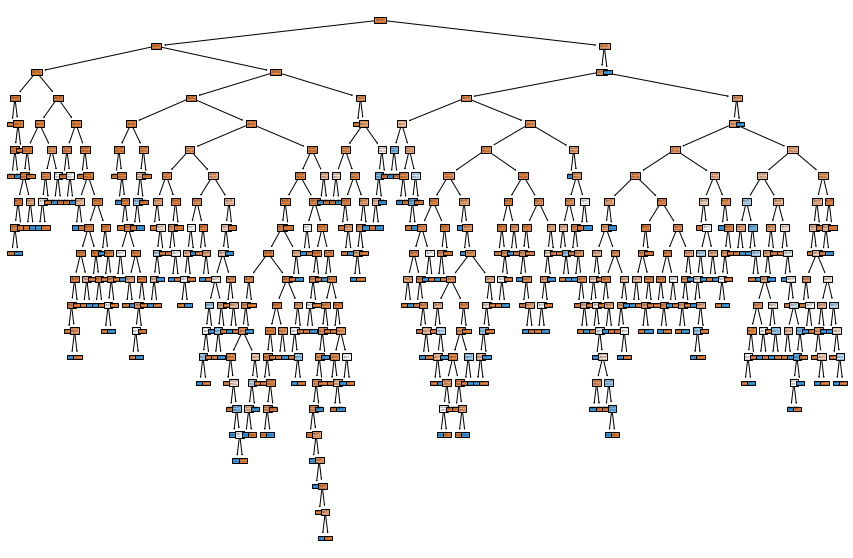

In [114]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

In [115]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

<ipython-input-115-6095f699ef19>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Confusion matrix for Random Forest
 [[968   0]
 [ 54   0]]
accuracy_random_Forest : 0.947
precision_random_Forest : 0.947
recall_random_Forest : 0.947
f1-score_random_Forest : 0.947


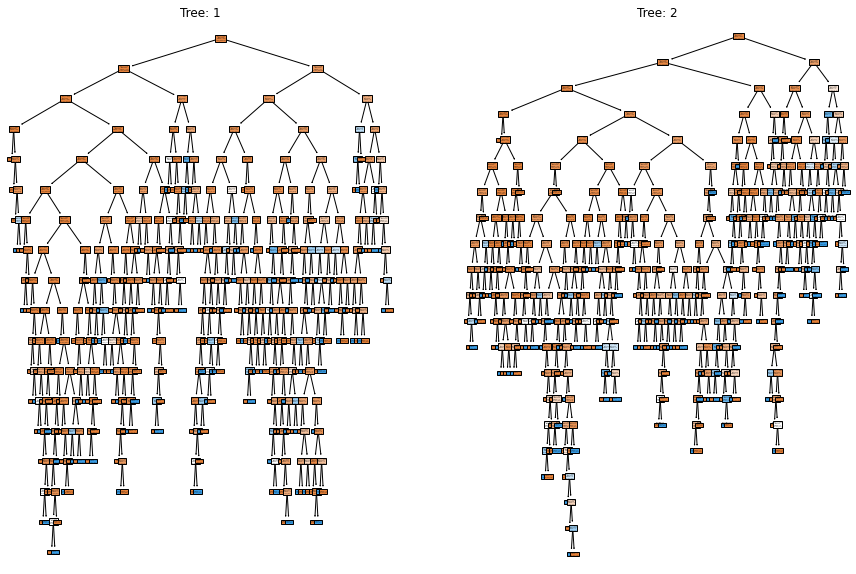

In [120]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
for i in range(1,3):
    plt.subplot(1,2,i)
    plot_tree(random_forest.estimators_[i],filled=True)
    plt.title("Tree: " + str(i))
plt.show()

In [121]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

d:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion matrix for KNN
 [[963   5]
 [ 53   1]]
accuracy_KNN : 0.943
precision_KNN : 0.943
recall_KNN: 0.943
f1-score_KNN : 0.943


<ipython-input-122-7d905051aaab>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
d:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\Anaconda\lib\site-packa

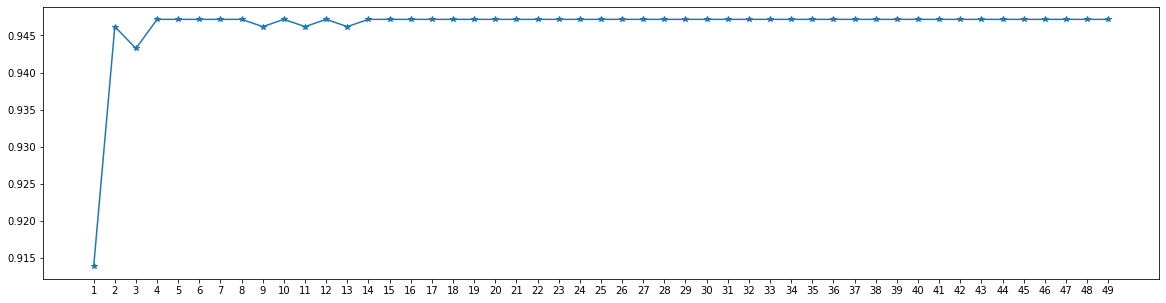

In [122]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

In [123]:
MLP = MLPClassifier(hidden_layer_sizes=150, random_state=3, max_iter=200)
MLP.fit(X_train, y_train)
Y_pred = MLP.predict(X_test) 
accuracy_MLP=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_MLP = round(MLP.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Multi Layer Perceptron\n',cm)
print('accuracy_Multi Layer Perceptron: %.3f' %accuracy)
print('precision_Multi Layer Perceptron: %.3f' %precision)
print('recall_Multi Layer Perceptron: %.3f' %recall)
print('f1-score_Multi Layer Perceptron : %.3f' %f1)

d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Confusion matrix for Multi Layer Perceptron
 [[966   2]
 [ 53   1]]
accuracy_Multi Layer Perceptron: 0.946
precision_Multi Layer Perceptron: 0.946
recall_Multi Layer Perceptron: 0.946
f1-score_Multi Layer Perceptron : 0.946


d:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [124]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Confusion matrix for SVC
 [[968   0]
 [ 54   0]]
accuracy_SVC: 0.947
precision_SVC: 0.947
recall_SVC: 0.947
f1-score_SVC : 0.947


In [125]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Random Forest',
              'Naive Bayes',  
              ' Support Vector Machine',
              'Multi Layer Perceptron',
              'Decision Tree'],
    'Score': [ acc_knn, 
              acc_random_forest,
              acc_gaussian,  
              acc_linear_svc,
              acc_MLP,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_MLP,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Random Forest,100.00,94.72
1,Support Vector Machine,95.23,94.72
2,Multi Layer Perceptron,95.55,94.62
3,KNN,95.79,94.32
4,Decision Tree,100.00,91.98
5,Naive Bayes,87.11,88.16


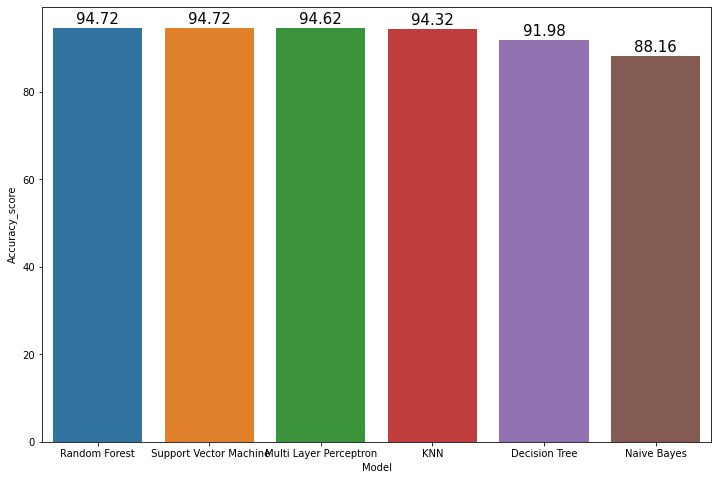

In [126]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')